 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [65]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [66]:
# Reading whale returns
whale_returns_data = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [67]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [68]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [69]:
# Reading algorithmic returns
algo_returns_data = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.sort_index(inplace=True)
algo_returns.head(15)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [70]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [71]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [72]:
# Reading S&P 500 Closing Prices
sp500_history_data = Path("Resources/sp500_history.csv")
sp500_returns = pd.read_csv(sp500_history_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns.sort_index(inplace=True)
sp500_returns.head(15)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48
2012-10-10,$1432.56
2012-10-11,$1432.84


In [73]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [74]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns["Close"].str.replace("$", "")
sp500_returns["Close"] = sp500_returns["Close"].astype("float")
sp500_returns["Close"].head(15)

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
2012-10-08    1455.88
2012-10-09    1441.48
2012-10-10    1432.56
2012-10-11    1432.84
2012-10-12    1428.59
2012-10-15    1440.13
2012-10-16    1454.92
2012-10-17    1460.91
2012-10-18    1457.34
2012-10-19    1433.19
Name: Close, dtype: float64

In [75]:
# Calculate Daily Returns
sp500_pct_change = sp500_returns.pct_change()
sp500_pct_change.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195


In [76]:
# Drop nulls
sp500_pct_change = sp500_pct_change.dropna()
sp500_pct_change.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [77]:
# Rename `Close` Column to be specific to this portfolio.
sp500_pct_change.rename(columns={'Close':'S&P500'}, inplace=True)
sp500_pct_change.head(10)

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195
2012-10-12,-0.002966


## Combine Whale, Algorithmic, and S&P 500 Returns

In [78]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_pct_change], axis='columns', join='inner')
combined_returns.head()
#combined_returns.merge()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

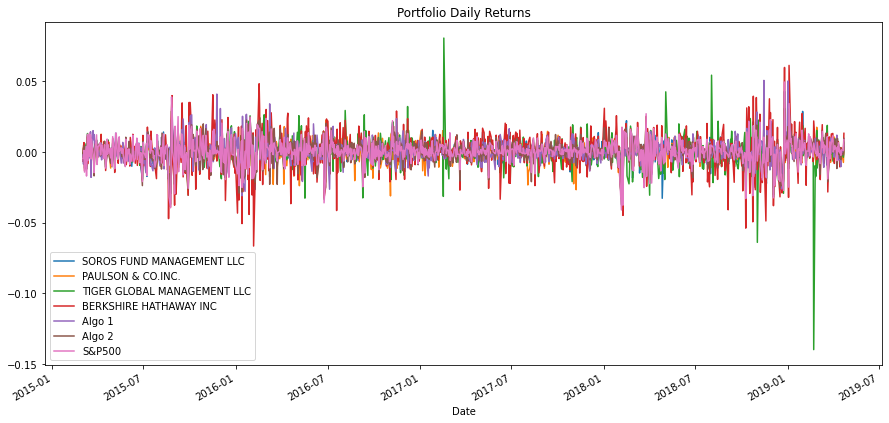

In [79]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(15,7), title=('Portfolio Daily Returns'))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolio Cumulative Returns'}, xlabel='Date'>

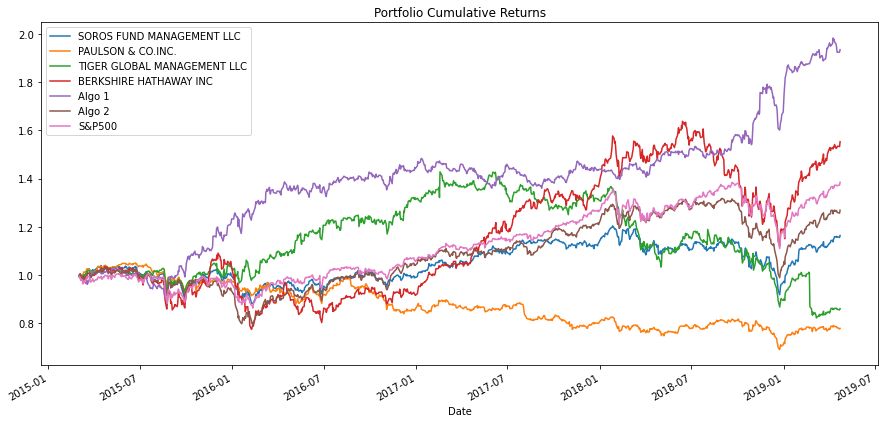

In [80]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1 + combined_returns).cumprod()
sp500_cumulative_returns = (1 + sp500_pct_change).cumprod()
algo_cumulative_returns = (1 + algo_returns).cumprod()
whale_cumulative_returns = (1 + whale_returns).cumprod()
                            
# Plot cumulative returns
combined_cumulative_returns.plot(figsize=(15,7), title=('Portfolio Cumulative Returns'))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

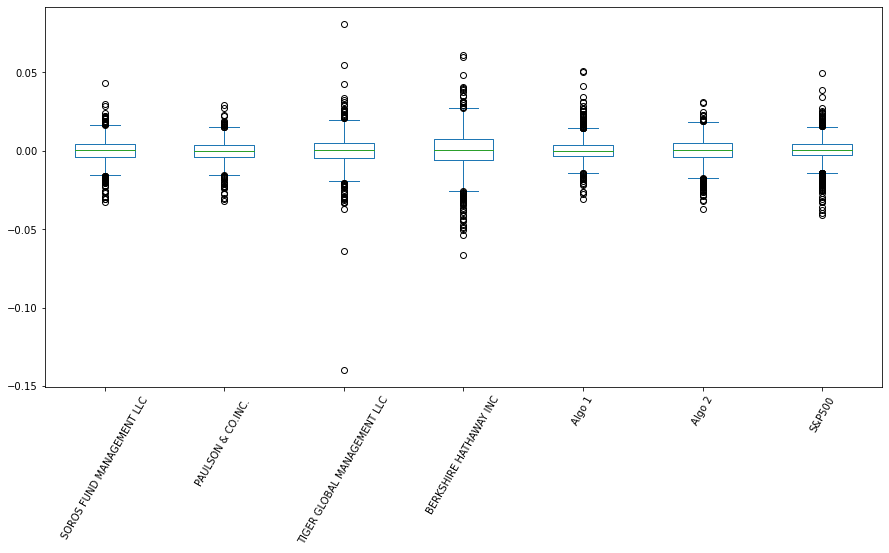

In [81]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(15,7), rot=60)

### Calculate Standard Deviations

In [82]:
# Calculate the daily standard deviations of all portfolios
portfolio_daily_std = combined_returns.std()
portfolio_daily_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [83]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
portfolio_daily_std = portfolio_daily_std.sort_values(ascending=True)
portfolio_daily_std.head(10)
##Tiger Global Management LLC and Berkshire Hathaway INC are riskier (more volatile) than the S&P500.
##Paulson & Co.Inc., Algo 1, Soros Fund Management LLC, and Algo 2 are all less risky (less volatile) than the S&P500.

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P500                         0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [84]:
portfolio_daily_std > portfolio_daily_std['S&P500']
#The question is "Is this portfolio riskier than the S&P500?", if No, False, if Yes, True.

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P500                         False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [85]:
# Calculate the annualized standard deviation (252 trading days)
portfolio_annualized_std = portfolio_daily_std * np.sqrt(252)
portfolio_annualized_std.head(10)

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P500                         0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

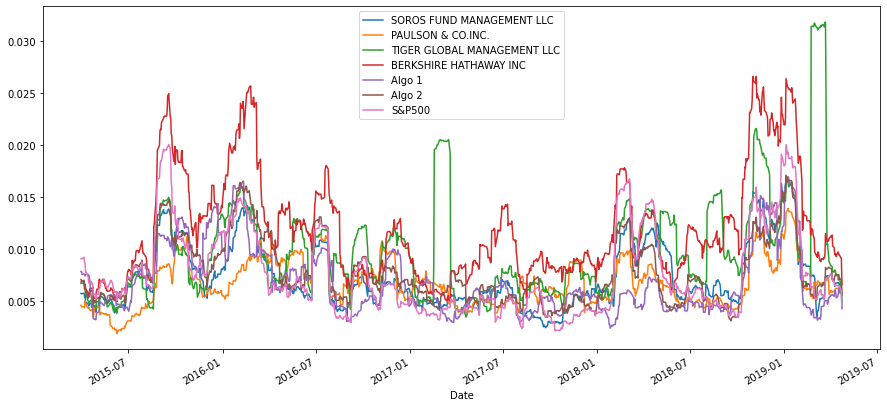

In [86]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize=(15,7))

### Calculate and plot the correlation

In [87]:
# Calculate the correlation
# Display de correlation matrix
corr_df = combined_returns.corr()
corr_df.style.background_gradient(cmap='Blues')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Algo 1 Portfolio Beta'}, xlabel='Date', ylabel='Beta'>

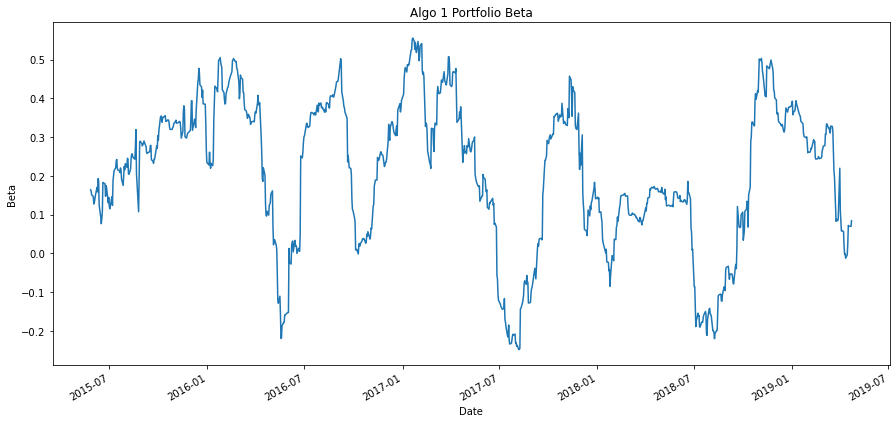

In [88]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_returns['Algo 1'].rolling(60).cov(combined_returns['S&P500'])
# Calculate variance of S&P 500
sp500_variance = combined_returns['S&P500'].rolling(60).var()
# Computing beta
algo1_beta = (algo1_covariance / sp500_variance)
# Plot beta trend
algo1_beta.plot(title=('Algo 1 Portfolio Beta'), ylabel=('Beta'), figsize=(15,7))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

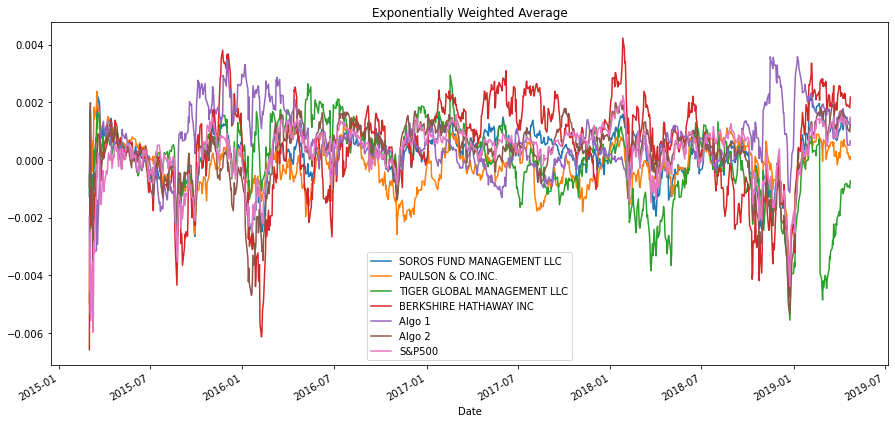

In [89]:
# Use `ewm` to calculate the rolling window
combined_returns_ewm = pd.DataFrame(combined_returns).ewm(halflife=21).mean().plot(figsize=(15,7), title='Exponentially Weighted Average')



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [90]:
# Annualized Sharpe Ratios
rf_rate = 0.00001
#rf rate not required, but used a small number to demonstrate how to insert
sharpe_ratios = ((combined_returns.mean()-rf_rate) * 252) / (portfolio_annualized_std)
sharpe_ratios.head(10)

Algo 1                         1.357816
Algo 2                         0.482335
BERKSHIRE HATHAWAY INC         0.609522
PAULSON & CO.INC.             -0.506173
S&P500                         0.629709
SOROS FUND MANAGEMENT LLC      0.336311
TIGER GLOBAL MANAGEMENT LLC   -0.135631
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

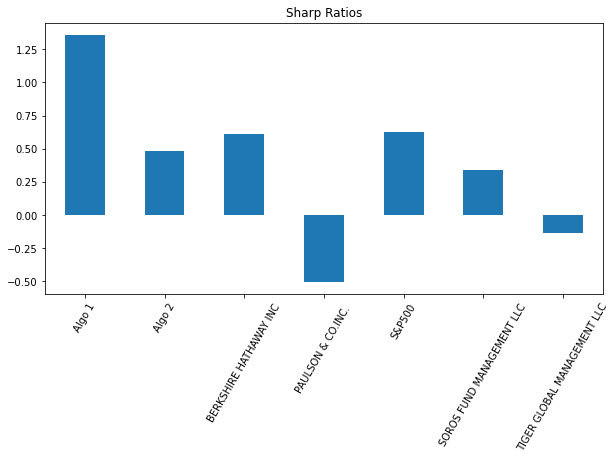

In [91]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharp Ratios", figsize=(10,5), rot=60)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

## Analysis
- ### The Algo 1 Portfolio **outperformed** the S&P500 and all Whale Portfolios. Algo 1 did this will less risk, for the returns, as shown by the Sharpe Ratio bar chart above.
- ### The Algo 2 Portfolio **underperformed** Algo 1, Berkshire, and the S&P 500 portfolios, but outperformed all other Whale Portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [92]:
# Reading data from 1st stock
aapl_historical_data = Path("Resources/aapl_historical.csv")
aapl_returns = pd.read_csv(aapl_historical_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_returns.sort_index(inplace=True)
aapl_returns.rename(columns={'NOCP':'AAPL NOCP'}, inplace=True)
aapl_returns.head()

,Symbol,AAPL NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [93]:
# Reading data from 2nd stock
cost_historical_data = Path("Resources/cost_historical.csv")
cost_returns = pd.read_csv(cost_historical_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_returns.sort_index(inplace=True)
cost_returns.rename(columns={'NOCP':'COST NOCP'}, inplace=True)
cost_returns.head()

,Symbol,COST NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [94]:
# Reading data from 3rd stock
goog_historical_data = Path("Resources/goog_historical.csv")
goog_returns = pd.read_csv(goog_historical_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_returns.sort_index(inplace=True)
goog_returns.rename(columns={'NOCP':'GOOG NOCP'}, inplace=True)
goog_returns.head()

,Symbol,GOOG NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [95]:
# Combine all stocks in a single DataFrame
combined_stock_returns = pd.concat([aapl_returns, cost_returns, goog_returns], axis='columns', join='inner')
combined_stock_returns.head()

,Symbol,AAPL NOCP,Symbol,COST NOCP,Symbol,GOOG NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59


In [96]:
# Reset Date index
# Performed above

In [97]:
# Reorganize portfolio data by having a column per symbol
combined_stock_returns.drop(columns={'Symbol'}, inplace=True)
combined_stock_returns.head()

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [98]:
# Calculate daily returns
stock_daily_returns = combined_stock_returns.pct_change()

# Drop NAs
stock_daily_returns = stock_daily_returns.dropna()
# Display sample data
stock_daily_returns.head(10)

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
2018-05-21,0.007085,0.003317,0.012397
2018-05-22,-0.002505,-0.003256,-0.009124
2018-05-23,0.006412,-0.004171,0.009311
2018-05-24,-0.001115,0.003785,-0.000417


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [99]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

custom_portfolio_returns = stock_daily_returns.dot(weights)

# Display sample data
custom_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [100]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_returns = pd.concat([combined_returns, custom_portfolio_returns], axis='columns', join='inner')
combined_portfolio_returns.columns=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P500', 'Custom Portfolio'] 
#combined_portfolio_returns.rename(columns={'0':'Custom Portfolio'}, inplace=True)
combined_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [101]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns = combined_portfolio_returns.dropna()
combined_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [102]:
# Calculate the annualized `std`
combined_portfolio_daily_std = combined_portfolio_returns.std()
combined_portfolio_annualized_std = combined_portfolio_daily_std * np.sqrt(252)
combined_portfolio_annualized_std.head(10)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P500                         0.152054
Custom Portfolio               0.211496
dtype: float64

In [103]:
combined_portfolio_daily_std = combined_portfolio_daily_std.sort_values(ascending=True)
combined_portfolio_daily_std > combined_portfolio_daily_std['S&P500']
#The question is "Is this portfolio riskier than the S&P500?", if No, False, if Yes, True.

PAULSON & CO.INC.              False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
S&P500                         False
Custom Portfolio                True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Standard Deviation'}>

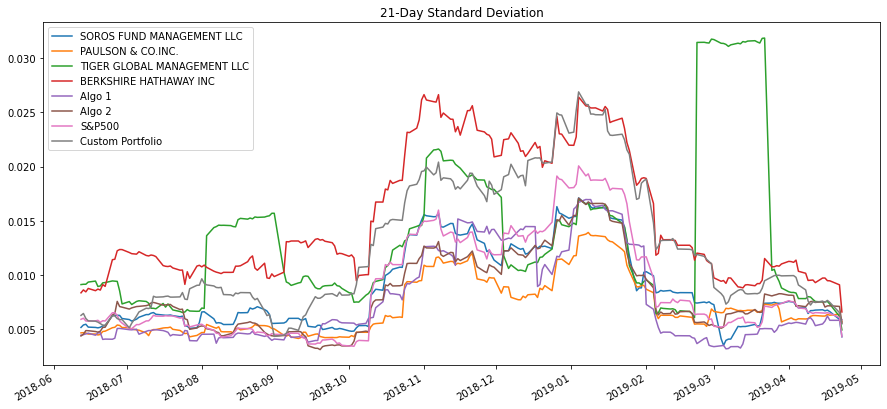

In [104]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_portfolio_returns.rolling(window=21).std().plot(figsize=(15,7), title=('21-Day Standard Deviation'))

### Calculate and plot the correlation

In [105]:
# Calculate and plot the correlation
combined_corr_df = combined_portfolio_returns.corr()
combined_corr_df.style.background_gradient(cmap='Blues')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, ylabel='Beta'>

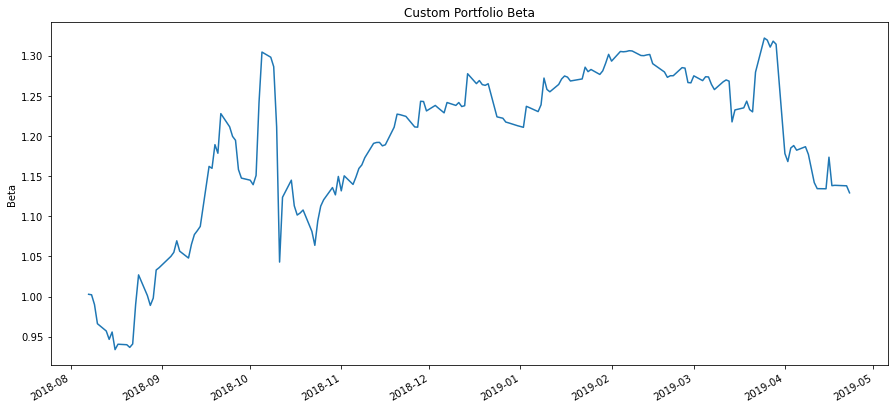

In [106]:
# Calculate and plot Beta
custom_portfolio_covariance = combined_portfolio_returns['Custom Portfolio'].rolling(60).cov(combined_portfolio_returns['S&P500'])
custom_portfolio_beta = (custom_portfolio_covariance / sp500_variance)
custom_portfolio_beta.plot(title=('Custom Portfolio Beta'), ylabel=('Beta'), figsize=(15,7))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [107]:
# Calculate Annualized Sharpe Ratios
combined_portfolio_sharpe_ratios = ((combined_portfolio_returns.mean()-rf_rate) * 252) / (combined_portfolio_annualized_std)
combined_portfolio_sharpe_ratios.head(10)

SOROS FUND MANAGEMENT LLC      0.413532
PAULSON & CO.INC.              0.237150
TIGER GLOBAL MANAGEMENT LLC   -1.045054
BERKSHIRE HATHAWAY INC         0.149560
Algo 1                         2.016817
Algo 2                         0.062550
S&P500                         0.568247
Custom Portfolio               0.921208
dtype: float64

<AxesSubplot:title={'center':'Combined Portfolios - Sharp Ratios'}>

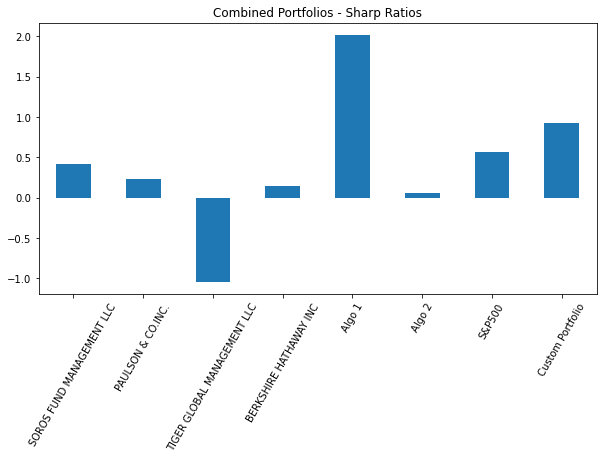

In [108]:
# Visualize the sharpe ratios as a bar plot
combined_portfolio_sharpe_ratios.plot(kind="bar", title="Combined Portfolios - Sharp Ratios", figsize=(10,5), rot=60)

### How does your portfolio do?

Write your answer here!

### Final Analysis
#### In summary, with respects to return, volatility and and risk (Sharpe Ratios), how did each of the porfolios, to include the Custom Portfolio, fare within each of themselves and against the industry benchmark, the S&P 500.
- ### Return on investment - When looking at the cumulative return on investment, the Algo 1 portfolio performed the best followed by the Custom Portfolio and Berkshire Hathaway. All three outperforming the S&P 500 index. All other portfolios underperformed related to the S&P 500.
- ### Volatility - When looking at the standard deviation of each portfolio, Algo 1, Tiger Global Management Inc. and the Custom Portfolio have greater volatility than the S&P 500 and the other portfolios. When compared to the Sharpe Ratio, the return versus risk for Algo 1 and the Custom Portfolio warrent the greater volatility, however, Tiger Global Management Inc. does not.
- ### Risk (Sharp Ratios) - When considering the risk, volatility and the returns, it is evident the Algo 1 portfolio is by far on top with the Custom Portfolio a strong second. All other portfolios fall in line underperforming the benchmark S&P 500.